In [704]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Creating Dataframe

In [705]:
peng_df = pd.read_csv('penguins_lter.csv')
peng_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [706]:
### Investigating columns ###

peng_df['studyName'].unique() # Shows there are 3 different studies in the dataset: 'PAL0708', 'PAL0809', and 'PAL0910'

peng_df['Sample Number'].unique() # 152 sample numbers for 344 entires
peng_df = peng_df.drop(columns=['Sample Number']) # Drops sample numbers as the column will not be used in this analysis.

peng_df['Individual ID'].unique() # Fewer individual IDs than rows. Individual IDs are reused for different penguins.
peng_df = peng_df.drop(columns=['Individual ID']) # Drops ID column to avoid confusion as IDs are reused

peng_df['Region'].unique() # All penguins are from the Anvers region
peng_df = peng_df.drop(columns=['Region']) # Drops the region column as all penguins are from the same region

peng_df['Island'].unique() # Penguins can be from the island of Torgersen, Biscoe, or Dream.

peng_df['Stage'].unique() # All penguins are at the stage 'Adult, 1 Egg Stage'
peng_df = peng_df.drop(columns=['Stage']) # Drops the stage column as all penguins are at the same stage

peng_df['Species'].unique() # Contains 3 species: Adelie, Chinstrap, and Gentoo
peng_df['Species'] = peng_df['Species'].replace('Adelie Penguin (Pygoscelis adeliae)', 'Adelie') # Shortens species names for neater graphs
peng_df['Species'] = peng_df['Species'].replace('Chinstrap penguin (Pygoscelis antarctica)', 'Chinstrap')
peng_df['Species'] = peng_df['Species'].replace('Gentoo penguin (Pygoscelis papua)', 'Gentoo')

In [707]:
### Changing the 'Date Egg' Column to Datetime ###
peng_df['Date Egg'].head()

peng_df['Date Egg'] = pd.to_datetime(peng_df['Date Egg'], format='%m/%d/%y')

Handling Missing Data

In [708]:
peng_df.isna().sum() # Counts Nan values

studyName                0
Species                  0
Island                   0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [709]:
peng_df['Comments'].unique() # Shows that generally data is missing as sometimes researchers were unable to obtain enough blood from the penguin.

array(['Not enough blood for isotopes.', nan, 'Adult not sampled.',
       'Nest never observed with full clutch.',
       'No blood sample obtained.',
       'No blood sample obtained for sexing.',
       'Nest never observed with full clutch. Not enough blood for isotopes.',
       'Sexing primers did not amplify. Not enough blood for isotopes.'],
      dtype=object)

In [710]:
peng_df = peng_df.drop(columns=['Comments']) # Drops comments column, as it is mostly made up of NaN values

In [711]:
### Replacing missing values in columns containing continuous data with the mean of value of the column ###

peng_df['Culmen Length (mm)'] = peng_df['Culmen Length (mm)'].fillna(peng_df['Culmen Length (mm)'].mean())
peng_df['Culmen Depth (mm)'] = peng_df['Culmen Depth (mm)'].fillna(peng_df['Culmen Depth (mm)'].mean())
peng_df['Flipper Length (mm)'] = peng_df['Flipper Length (mm)'].fillna(peng_df['Flipper Length (mm)'].mean())
peng_df['Body Mass (g)'] = peng_df['Body Mass (g)'].fillna(peng_df['Body Mass (g)'].mean())
peng_df['Delta 15 N (o/oo)'] = peng_df['Delta 15 N (o/oo)'].fillna(peng_df['Delta 15 N (o/oo)'].mean())
peng_df['Delta 13 C (o/oo)'] = peng_df['Delta 13 C (o/oo)'].fillna(peng_df['Delta 13 C (o/oo)'].mean())

peng_df.isna().sum() # The only column remaining with missing values is the 'Sex' column, with 10 NaN values.

studyName               0
Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Sex                    10
Delta 15 N (o/oo)       0
Delta 13 C (o/oo)       0
dtype: int64

Inferring the Likely Sex of Penguins with Missing Data

<AxesSubplot: xlabel='Species', ylabel='Body Mass (g)'>

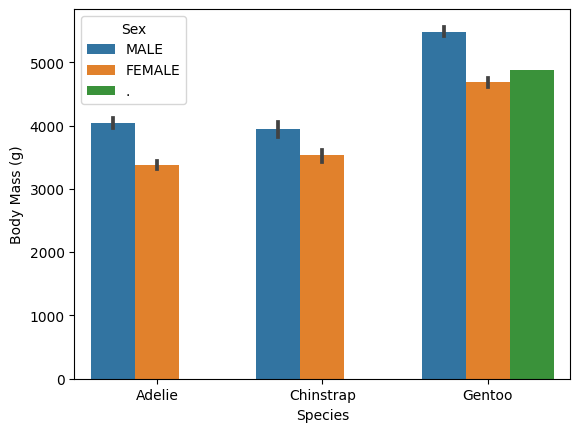

In [712]:
num_f = peng_df[peng_df.Sex == 'FEMALE'].shape[0] # Counts 165 femles
num_m = peng_df[peng_df.Sex == 'MALE'].shape[0] # Counts 168 males

sns.barplot(peng_df, y = 'Body Mass (g)', x = 'Species', hue = 'Sex')

This graph shows that body weight could be used to estimate sex. It also shows there is a penguin which has '.' as its sex instead of 'MALE/FEMALE/NaN'.

In [713]:
they_pengs = peng_df.fillna('?')
they_pengs.iloc[[336],[9]] = '?' # A single penguin as '.' as its sex. This changes it to '?'
they_pengs.loc[they_pengs['Sex'] == '?']

,studyName,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
3,PAL0708,Adelie,Torgersen,Yes,2007-11-16,43.92193,17.15117,200.915205,4201.754386,?,8.733382,-25.686292
8,PAL0708,Adelie,Torgersen,Yes,2007-11-09,34.10000,18.10000,193.000000,3475.000000,?,8.733382,-25.686292
9,PAL0708,Adelie,Torgersen,Yes,2007-11-09,42.00000,20.20000,190.000000,4250.000000,?,9.133620,-25.093680
10,PAL0708,Adelie,Torgersen,Yes,2007-11-09,37.80000,17.10000,186.000000,3300.000000,?,8.632430,-25.213150
11,PAL0708,Adelie,Torgersen,Yes,2007-11-09,37.80000,17.30000,180.000000,3700.000000,?,8.733382,-25.686292
47,PAL0708,Adelie,Dream,Yes,2007-11-13,37.50000,18.90000,179.000000,2975.000000,?,8.733382,-25.686292
246,PAL0708,Gentoo,Biscoe,Yes,2007-11-29,44.50000,14.30000,216.000000,4100.000000,?,7.966210,-25.693270
286,PAL0809,Gentoo,Biscoe,Yes,2008-11-09,46.20000,14.40000,214.000000,4650.000000,?,8.242530,-26.815400
324,PAL0910,Gentoo,Biscoe,Yes,2009-12-01,47.30000,13.80000,216.000000,4725.000000,?,8.258180,-26.238860
336,PAL0910,Gentoo,Biscoe,Yes,2009-12-01,44.50000,15.70000,217.000000,4875.000000,?,8.041110,-26.184440


Penguin 339 and Penguin 3 had missing weights, and so we cannot use their weight to determine their sex.

For a more precise estimation of sex by weight, standard deviation will be used.

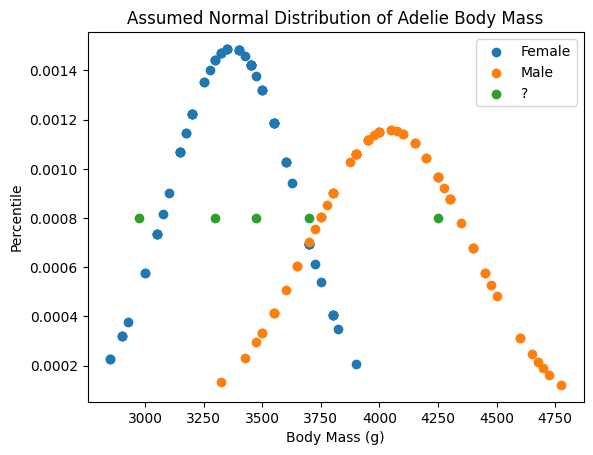

In [714]:
def bell_curve(df): # Function calculates the mean and standard deviation of a given column and calculates the spread of the dataset along that
    mean = np.mean(df)
    std = np.std(df)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (df - mean)**2 / (2 * std**2))
    return y_out

### ADELIES ###

adelie_f = peng_df[peng_df['Species'] == 'Adelie'] # Dataframe with only Adelie Females
adelie_f = adelie_f[adelie_f['Sex'] == 'FEMALE']

af_bell = bell_curve(adelie_f['Body Mass (g)']) # Gets distribution of masses along bell curve

adelie_m = peng_df[peng_df['Species'] == 'Adelie'] # Dataframe with only Adelie Males
adelie_m = adelie_m[adelie_m['Sex'] == 'MALE']

am_bell = bell_curve(adelie_m['Body Mass (g)'])

adelie_nans = [3475.000000, 4250.000000, 3300.000000, 3700.000000, 2975.000000] # Masses of our unsexed Adelie penguins

plt.scatter(adelie_f['Body Mass (g)'], af_bell)
plt.scatter(adelie_m['Body Mass (g)'], am_bell)
plt.scatter(adelie_nans, [0.0008]*5)
plt.xlabel('Body Mass (g)')
plt.ylabel('Percentile')
plt.legend(['Female', 'Male', '?'])
plt.title('Assumed Normal Distribution of Adelie Body Mass')
plt.show()

Judging by the above graph:

ADELIE penguin weighing

4250g: Extremely likely to be MALE

3700g: Slightly more likely to be MALE

3475g: Very likely to be FEMALE

3300: Very to be FEMALE

2975: Very likely to be FEMALE

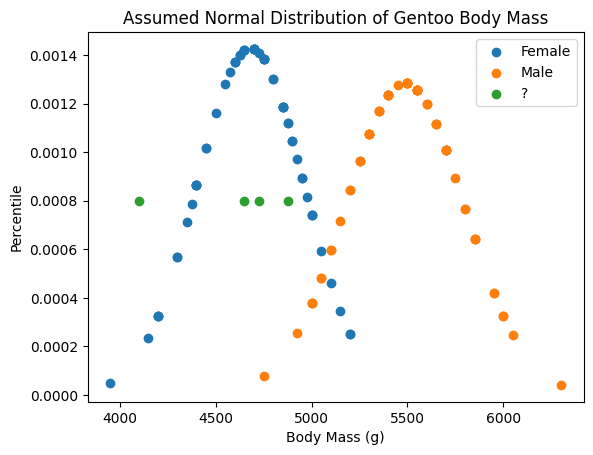

In [715]:
## GENTOOS ###

gentoo_f = peng_df[peng_df['Species'] == 'Gentoo'] # Dataframe with only Gentoo Females
gentoo_f = gentoo_f[gentoo_f['Sex'] == 'FEMALE']

gf_bell = bell_curve(gentoo_f['Body Mass (g)']) # Gets distribution of masses along bell curve

gentoo_m = peng_df[peng_df['Species'] == 'Gentoo'] # Dataframe with only Gentoo Males
gentoo_m = gentoo_m[gentoo_m['Sex'] == 'MALE']

gm_bell = bell_curve(gentoo_m['Body Mass (g)'])

gentoo_nans = [4725.000000, 4650.000000, 4100.000000, 4875.000000] # Masses of our unsexed Gentoo penguins

plt.scatter(gentoo_f['Body Mass (g)'], gf_bell)
plt.scatter(gentoo_m['Body Mass (g)'], gm_bell)
plt.scatter(gentoo_nans, [0.0008]*4)
plt.xlabel('Body Mass (g)')
plt.ylabel('Percentile')
plt.legend(['Female', 'Male', '?'])
plt.title('Assumed Normal Distribution of Gentoo Body Mass')
plt.show()

Judging by the above graph:

GENTOO penguin weighing

4875g: Likely to be FEMALE

4725g: Very likely to be FEMALE

4650g: Very likely to be FEMALE

4100g: Extremely likely to be FEMALE

In [716]:
### Adding Sexes for these Penguins ###

peng_df.iloc[[8, 10, 47, 324, 286, 246, 336],[9]] = 'FEMALE' # Changes the sex of unsexed suspected female penguins to 'FEMALE'
peng_df.iloc[[9,11],[9]] = 'MALE' # Changes the sex of unsexed suspected male penguins to 'MALE'

As we cannot reliably predict the sex of Penguin 339 and 3, and most of their other data was predicted based on averages, we will remove them from the dataframe.

In [717]:
peng_df.drop([3,339], axis=0, inplace=True)

peng_df.isna().sum()

studyName              0
Species                0
Island                 0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

Exploratory Data Analysis

In [718]:
peng_df

,studyName,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,Adelie,Torgersen,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,8.733382,-25.686292
1,PAL0708,Adelie,Torgersen,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.949560,-24.694540
2,PAL0708,Adelie,Torgersen,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.368210,-25.333020
4,PAL0708,Adelie,Torgersen,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.766510,-25.324260
5,PAL0708,Adelie,Torgersen,Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE,8.664960,-25.298050
...,...,...,...,...,...,...,...,...,...,...,...,...
338,PAL0910,Gentoo,Biscoe,No,2009-12-01,47.2,13.7,214.0,4925.0,FEMALE,7.991840,-26.205380
340,PAL0910,Gentoo,Biscoe,Yes,2009-11-22,46.8,14.3,215.0,4850.0,FEMALE,8.411510,-26.138320
341,PAL0910,Gentoo,Biscoe,Yes,2009-11-22,50.4,15.7,222.0,5750.0,MALE,8.301660,-26.041170
342,PAL0910,Gentoo,Biscoe,Yes,2009-11-22,45.2,14.8,212.0,5200.0,FEMALE,8.242460,-26.119690


<AxesSubplot: xlabel='Species', ylabel='Body Mass (g)'>

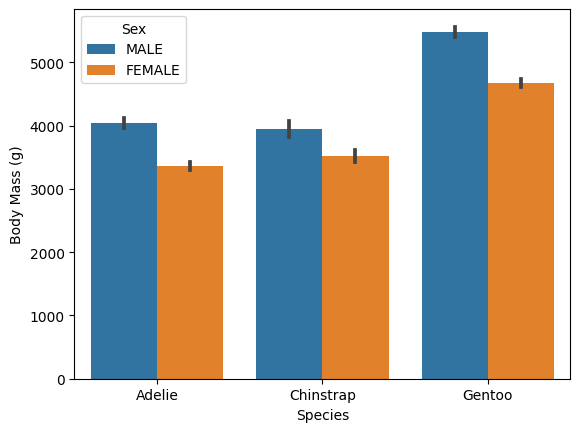

In [719]:
sns.barplot(peng_df, y = 'Body Mass (g)', x = 'Species', hue = 'Sex')

Here we can see male penguins of all species are higher in mass than female penguins.

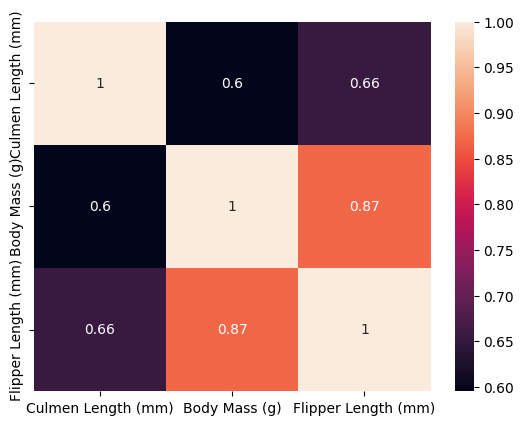

In [720]:

beak_mass_flip = peng_df[['Culmen Length (mm)', 'Body Mass (g)', 'Flipper Length (mm)']]
plt.figure()
corr_coeff_mat = beak_mass_flip.corr() 
sns.heatmap(corr_coeff_mat, annot=True) 
plt.show()
plt.close()

This graph shows that there is a very strong correlation between Body Mass and Flipper Length. While there is still a correlation between Body Mass and Culmen Length, it is not as strong. 

This may be because heavier penguins need longer flippers for propelling themselves through the water, however, as their beak function is not mobility related (eg. catching fish), they wouldn't have a need for beaks to increase in size as proportionally to their body mass (eg. the fish are still the same size so they do not require a larger beak to catch them).

<AxesSubplot: xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

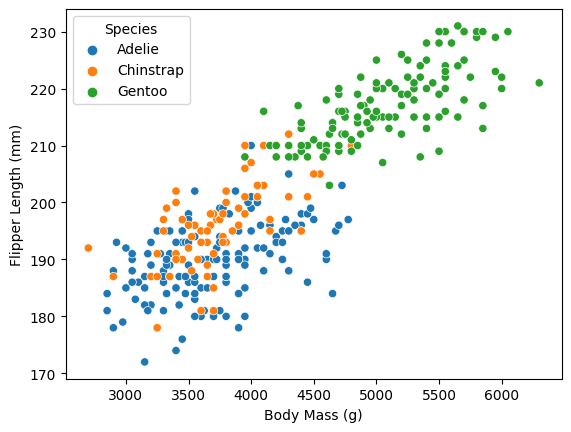

In [721]:
sns.scatterplot(peng_df, x = 'Body Mass (g)', y = 'Flipper Length (mm)', hue = 'Species')

When looking at Flipper Length and Body Mass by species, this remains true.

The graph also shows that Gentoo are the larger of the penguin species and have longer flippers. Chinstaps have longer flippers for their size than Adelies, but have about the same body weight range as them.

<AxesSubplot: xlabel='Body Mass (g)', ylabel='Culmen Length (mm)'>

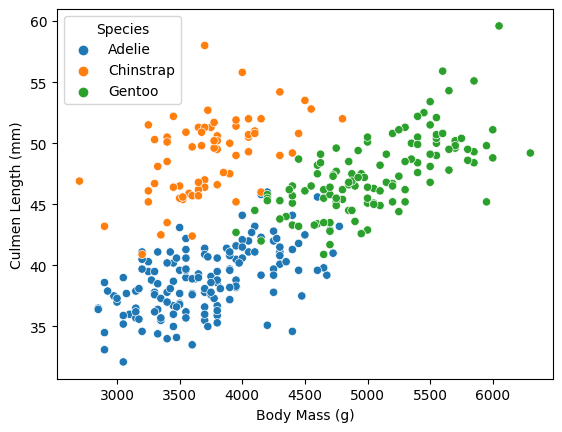

In [722]:
sns.scatterplot(peng_df, x = 'Body Mass (g)', y = 'Culmen Length (mm)', hue = 'Species')

When comparing Body Mass and Culmen Length by species the original conclusion also remains true: there is a positive correlation, but with a lot more variation and a gentler slope.

<AxesSubplot: xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

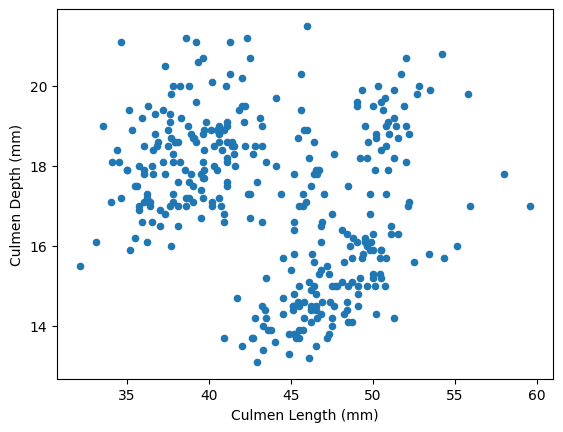

In [723]:
peng_df.plot.scatter(x = 'Culmen Length (mm)', y = 'Culmen Depth (mm)')

Judging by this graph, there is a weak negative correlation between Culmen Length and Culmen Depth. 

However, this may change when we separate the data by species.

<AxesSubplot: xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

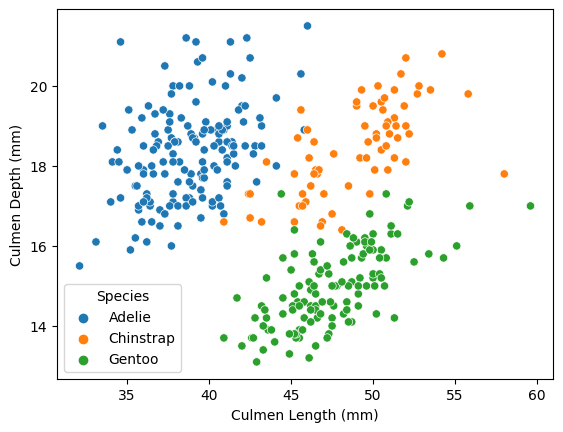

In [724]:
sns.scatterplot(peng_df, x = 'Culmen Length (mm)', y = 'Culmen Depth (mm)', hue = 'Species')

We can now see that there is in fact a positive correlation between Culmen Length and Depth. Adelie Penguins tend to have shorter but deeper bills, Gentoo Penguins have longer but thinner bills, and Chinstrap Penguins have bills that are on average slightly longer than the Gentoos, and not as deep as the Adelies.

This graph makes it clear that separating by species is a necessity for analysing this dataset.

Text(0, 0.5, 'Percentage of Clutches Complete')

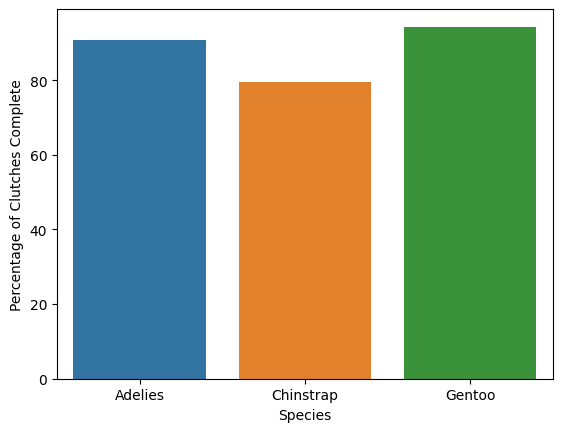

In [725]:
peng_df.rename(columns = {'Clutch Completion':'Clutch_Completion'}, inplace = True)

def clutch_perc(penguin_group): # Function to calculate the percentage of complete clutches in a given penguin group
    total = penguin_group.shape[0] # Counts the total number of penguins of the given group
    total_comp_clutches = penguin_group[penguin_group.Clutch_Completion == 'Yes'].shape[0] # Counts the number of peguins with complete clutches of the given group
    perc_comp = (total_comp_clutches/total)*100 # Calculates the percentage of clutches of the given group which were complete
    return perc_comp

adelie_df = peng_df[peng_df['Species'] == 'Adelie'] # Separates the dataframe into three by species
chinstrap_df = peng_df[peng_df['Species'] == 'Chinstrap']
gentoo_df = peng_df[peng_df['Species'] == 'Gentoo']

clutches = [clutch_perc(adelie_df), clutch_perc(chinstrap_df), clutch_perc(gentoo_df)]
clutch_labels = ['Adelies', 'Chinstrap', 'Gentoo']

sns.barplot(x = clutch_labels, y = clutches)
plt.xlabel('Species')
plt.ylabel('Percentage of Clutches Complete')

This graph shows that species does not have a huge affect on the likelyhood of a clutch being complete or not. 

Over 80% of clutches belonging to Adelies and Gentoos were complete (2 eggs), and just under 80% of Chinstrap clutches.

<AxesSubplot: xlabel='Island', ylabel='Density'>

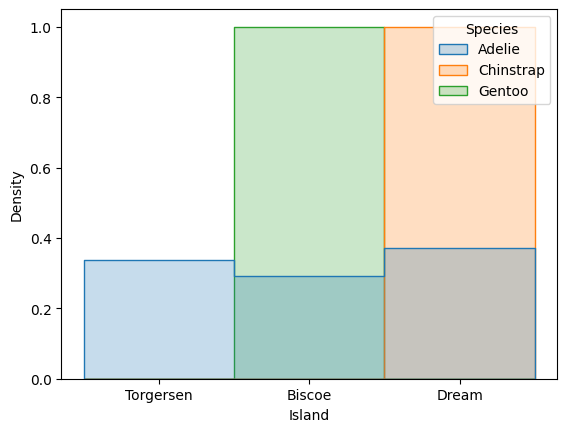

In [726]:
sns.histplot(peng_df, x="Island", hue="Species", element="step", stat="density", common_norm=False,)

This graph shows that out of the penguins studied, Adelies can be found on every island, but Gentoo can only be found on Biscoe, and Chinstraps can only be found on Dream. The only species on Torgersen is the Adelie.

Text(0, 0.5, 'Percentage of Clutches Complete')

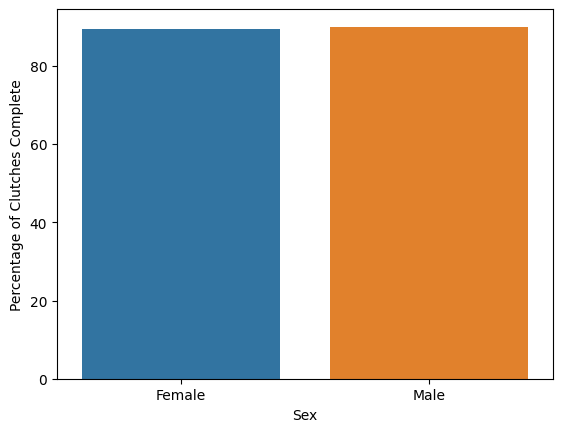

In [727]:
f_peng = peng_df[peng_df['Sex'] == 'FEMALE'] # Dataframe with only females
m_peng = peng_df[peng_df['Sex'] == 'MALE'] # Dataframe with only males

perc_yes = [clutch_perc(f_peng), clutch_perc(m_peng)]
sex_lables = ['Female', 'Male']

sns.barplot(x = sex_lables, y = perc_yes)
plt.xlabel('Sex')
plt.ylabel('Percentage of Clutches Complete')

As expected, sex has no effect on whether a clutch is complete, as each clutch likely has two parents, one of each sex.

6300.0
2700.0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '<3.5kg'),
  Text(1, 0, '3.5kg - 4.0kg'),
  Text(2, 0, '4.0kg - 4.5kg'),
  Text(3, 0, '4.5kg - 5.0kg'),
  Text(4, 0, '5.0kg - 5.5kg'),
  Text(5, 0, '>5.5kg')])

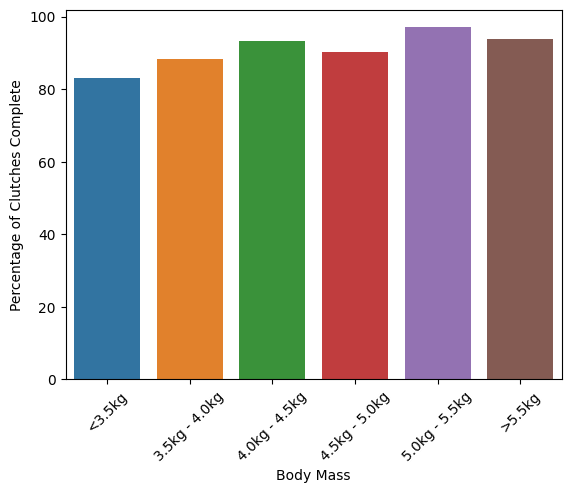

In [728]:
heafty = peng_df['Body Mass (g)'].max()
weightless = peng_df['Body Mass (g)'].min()
print(heafty)
print(weightless)

lightest = peng_df[peng_df['Body Mass (g)'] <3500] # 2700g to 3500g

med_light = peng_df[peng_df['Body Mass (g)'] >=3500] # 3500g to 4000g
med_light = med_light[med_light['Body Mass (g)'] <4000]

medium = peng_df[peng_df['Body Mass (g)'] >=4000] # 4000g to 4500g
medium = medium[medium['Body Mass (g)'] <4500] 

med_heavy = peng_df[peng_df['Body Mass (g)'] >=4500] # 4500g to 5000g
med_heavy = med_heavy[med_heavy['Body Mass (g)'] <5000]

heavy = peng_df[peng_df['Body Mass (g)'] >=5000] # 5000g to 5500g
heavy = heavy[heavy['Body Mass (g)'] <5500]

heaviest = peng_df[peng_df['Body Mass (g)'] >=5500] # 5500g to 6300g

weight_groups = [clutch_perc(lightest), clutch_perc(med_light), clutch_perc(medium), clutch_perc(med_heavy), clutch_perc(heavy), clutch_perc(heaviest)]
weight_labels = ['<3.5kg', '3.5kg - 4.0kg', '4.0kg - 4.5kg', '4.5kg - 5.0kg', '5.0kg - 5.5kg','>5.5kg']

sns.barplot(x = weight_labels, y = weight_groups)
plt.xlabel('Body Mass')
plt.ylabel('Percentage of Clutches Complete')
plt.xticks(rotation = 45)

Body mass appears in this graph to have little effect on clutch completion, and as previously seen species also has little effect, so we can assume that species differences are not having a huge effect on this graph.

4775.0
2850.0


(array([0, 1, 2, 3]),
 [Text(0, 0, '<3.5kg'),
  Text(1, 0, '3.5kg - 4.0kg'),
  Text(2, 0, '4.0kg - 4.5kg'),
  Text(3, 0, '4.5kg - 5.0kg')])

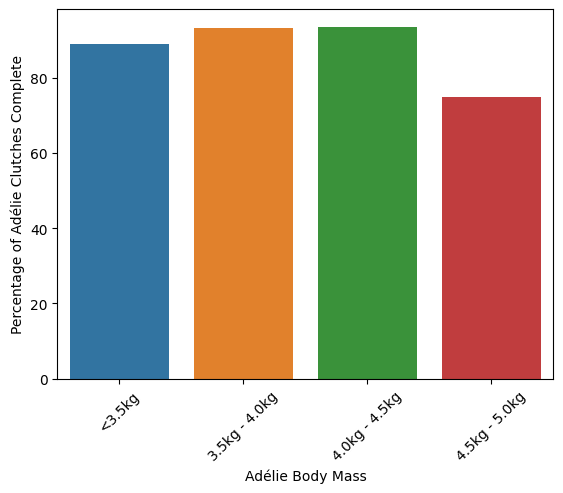

In [729]:
heafty = adelie_df['Body Mass (g)'].max()
weightless = adelie_df['Body Mass (g)'].min()
print(heafty)
print(weightless)

lightest = adelie_df[adelie_df['Body Mass (g)'] <3500] # 2700g to 3500g

med_light = adelie_df[adelie_df['Body Mass (g)'] >=3500] # 3500g to 4000g
med_light = med_light[med_light['Body Mass (g)'] <4000]

medium = adelie_df[adelie_df['Body Mass (g)'] >=4000] # 4000g to 4500g
medium = medium[medium['Body Mass (g)'] <4500] 

med_heavy = adelie_df[adelie_df['Body Mass (g)'] >=4500] # 4500g to 5000g
med_heavy = med_heavy[med_heavy['Body Mass (g)'] <5000]

weight_groups = [clutch_perc(lightest), clutch_perc(med_light), clutch_perc(medium), clutch_perc(med_heavy)]
weight_labels = ['<3.5kg', '3.5kg - 4.0kg', '4.0kg - 4.5kg', '4.5kg - 5.0kg']

sns.barplot(x = weight_labels, y = weight_groups)
plt.xlabel('Adélie Body Mass')
plt.ylabel('Percentage of Adélie Clutches Complete')
plt.xticks(rotation = 45)

6300.0
3950.0


(array([0, 1, 2, 3]),
 [Text(0, 0, '3.9kg - 4.5kg'),
  Text(1, 0, '4.5kg - 5.0kg'),
  Text(2, 0, '5.0kg - 5.5kg'),
  Text(3, 0, '>5.5kg')])

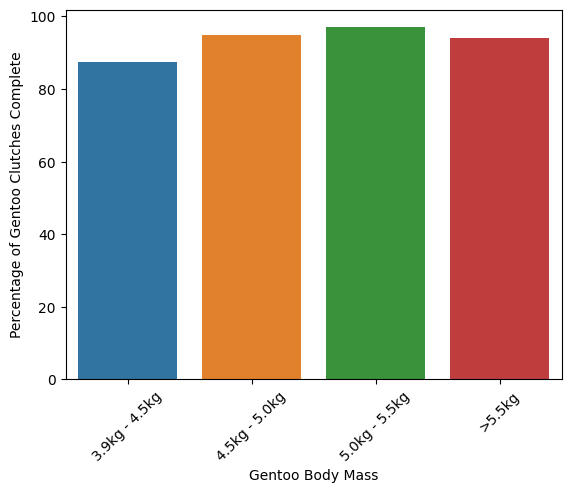

In [730]:
heafty = gentoo_df['Body Mass (g)'].max()
weightless = gentoo_df['Body Mass (g)'].min()
print(heafty)
print(weightless)

medium = gentoo_df[gentoo_df['Body Mass (g)'] >=3900] # 3900g to 4500g
medium = medium[medium['Body Mass (g)'] <4500] 

med_heavy = gentoo_df[gentoo_df['Body Mass (g)'] >=4500] # 4500g to 5000g
med_heavy = med_heavy[med_heavy['Body Mass (g)'] <5000]

heavy = gentoo_df[gentoo_df['Body Mass (g)'] >=5000] # 5000g to 5500g
heavy = heavy[heavy['Body Mass (g)'] <5500]

heaviest = gentoo_df[gentoo_df['Body Mass (g)'] >=5500] # 5500g to 6300g

weight_groups = [clutch_perc(medium), clutch_perc(med_heavy), clutch_perc(heavy), clutch_perc(heaviest)]
weight_labels = ['3.9kg - 4.5kg', '4.5kg - 5.0kg', '5.0kg - 5.5kg','>5.5kg']

sns.barplot(x = weight_labels, y = weight_groups)
plt.xlabel('Gentoo Body Mass')
plt.ylabel('Percentage of Gentoo Clutches Complete')
plt.xticks(rotation = 45)

4800.0
2700.0


(array([0, 1, 2, 3]),
 [Text(0, 0, '3.9kg - 4.5kg'),
  Text(1, 0, '4.5kg - 5.0kg'),
  Text(2, 0, '5.0kg - 5.5kg'),
  Text(3, 0, '>5.5kg')])

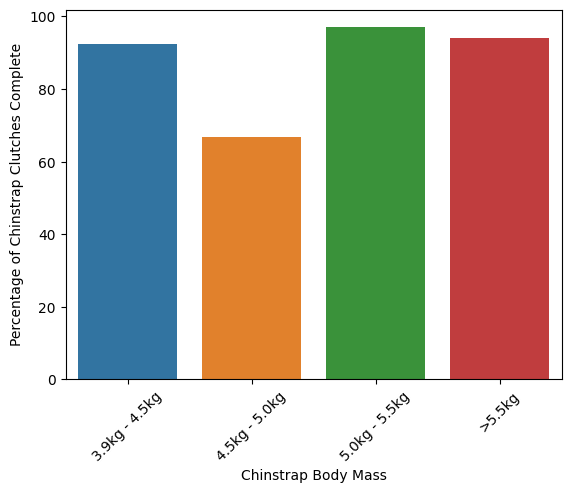

In [731]:
heafty = chinstrap_df['Body Mass (g)'].max()
weightless = chinstrap_df['Body Mass (g)'].min()
print(heafty)
print(weightless)

lightest = chinstrap_df[chinstrap_df['Body Mass (g)'] <3500] # 2700g to 3500g

med_light = chinstrap_df[chinstrap_df['Body Mass (g)'] >=3500] # 3500g to 4000g
med_light = med_light[med_light['Body Mass (g)'] <4000]

medium = chinstrap_df[chinstrap_df['Body Mass (g)'] >=4000] # 4000g to 4500g
medium = medium[medium['Body Mass (g)'] <4500] 

med_heavy = chinstrap_df[chinstrap_df['Body Mass (g)'] >=4500] # 4500g to 5000g
med_heavy = med_heavy[med_heavy['Body Mass (g)'] <5000]

weight_groups = [clutch_perc(medium), clutch_perc(med_heavy), clutch_perc(heavy), clutch_perc(heaviest)]
weight_labels = ['3.9kg - 4.5kg', '4.5kg - 5.0kg', '5.0kg - 5.5kg','>5.5kg']

sns.barplot(x = weight_labels, y = weight_groups)
plt.xlabel('Chinstrap Body Mass')
plt.ylabel('Percentage of Chinstrap Clutches Complete')
plt.xticks(rotation = 45)

Text(0, 0.5, 'Percentage of Clutches Complete')

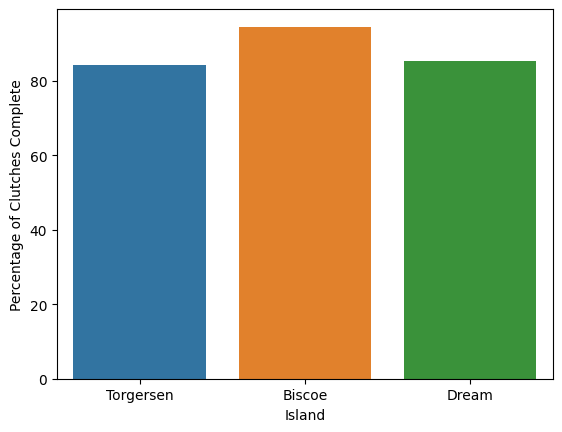

In [732]:
torgersen = peng_df[peng_df['Island'] == 'Torgersen'] # Dataframe with only torgersen penguins
biscoe = peng_df[peng_df['Island'] == 'Biscoe'] # Dataframe with only biscoe penguins
dream = peng_df[peng_df['Island'] == 'Dream'] # Dataframe with only dream penguins

perc_yes = [clutch_perc(torgersen), clutch_perc(biscoe), clutch_perc(dream)]
island_lables = ['Torgersen', 'Biscoe', 'Dream']

sns.barplot(x = island_lables, y = perc_yes)
plt.xlabel('Island')
plt.ylabel('Percentage of Clutches Complete')

Biscoe Island has a slightly higher percentage of complete clutches, which makes sense as it is both without Chinstrap penguins (the species with a slightly lower clutch completion rate) and comprised mostly of Gentoo Penguins (the species with a slightly higher clutch completion rate).

<AxesSubplot: xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

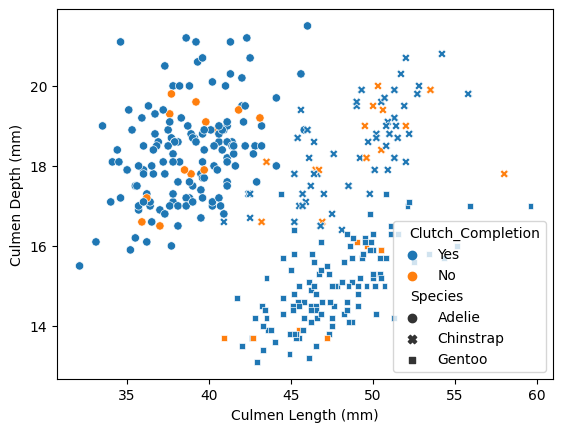

In [733]:
sns.scatterplot(peng_df, x = 'Culmen Length (mm)', y = 'Culmen Depth (mm)', hue = 'Clutch_Completion', style = 'Species')

There is no correlation between clutch completion and beak length.

<AxesSubplot: xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

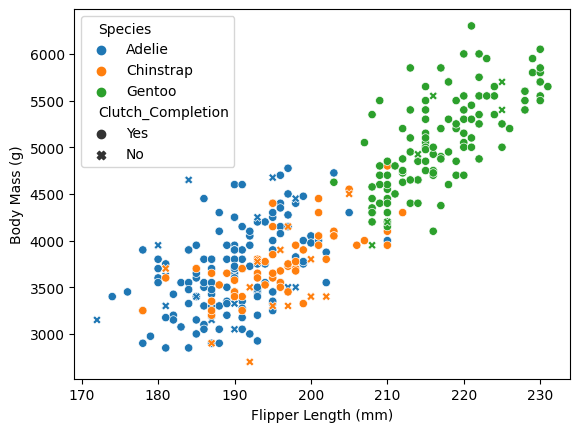

In [734]:
sns.scatterplot(peng_df, x = 'Flipper Length (mm)', y = 'Body Mass (g)', style = 'Clutch_Completion', hue = 'Species')

This graph combines the Clutch Completion/Body Mass/Species data into one graph, showing no real correlation between clutch completion and the other variables.

In [735]:
peng_df['Beak Size'] = peng_df['Culmen Length (mm)']*peng_df['Culmen Depth (mm)']
peng_df

,studyName,Species,Island,Clutch_Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Beak Size
0,PAL0708,Adelie,Torgersen,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,8.733382,-25.686292,731.17
1,PAL0708,Adelie,Torgersen,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.949560,-24.694540,687.30
2,PAL0708,Adelie,Torgersen,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.368210,-25.333020,725.40
4,PAL0708,Adelie,Torgersen,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.766510,-25.324260,708.31
5,PAL0708,Adelie,Torgersen,Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE,8.664960,-25.298050,809.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,PAL0910,Gentoo,Biscoe,No,2009-12-01,47.2,13.7,214.0,4925.0,FEMALE,7.991840,-26.205380,646.64
340,PAL0910,Gentoo,Biscoe,Yes,2009-11-22,46.8,14.3,215.0,4850.0,FEMALE,8.411510,-26.138320,669.24
341,PAL0910,Gentoo,Biscoe,Yes,2009-11-22,50.4,15.7,222.0,5750.0,MALE,8.301660,-26.041170,791.28
342,PAL0910,Gentoo,Biscoe,Yes,2009-11-22,45.2,14.8,212.0,5200.0,FEMALE,8.242460,-26.119690,668.96


The beak size column is the bill length multiplied by the bill depth, allowing comparison of both beak meassurments at once.

<AxesSubplot: xlabel='Beak Size', ylabel='Body Mass (g)'>

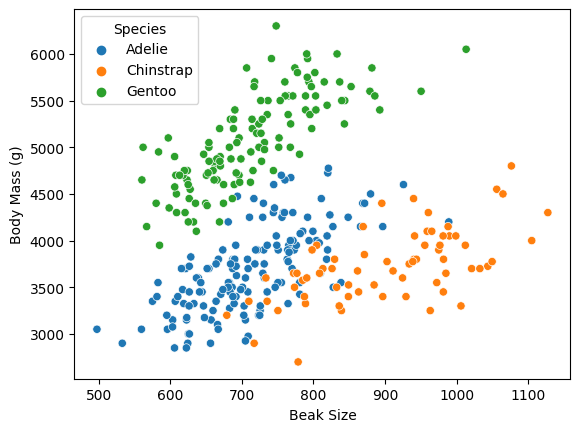

In [736]:
sns.scatterplot(peng_df, x = 'Beak Size', y = 'Body Mass (g)', hue = 'Species')



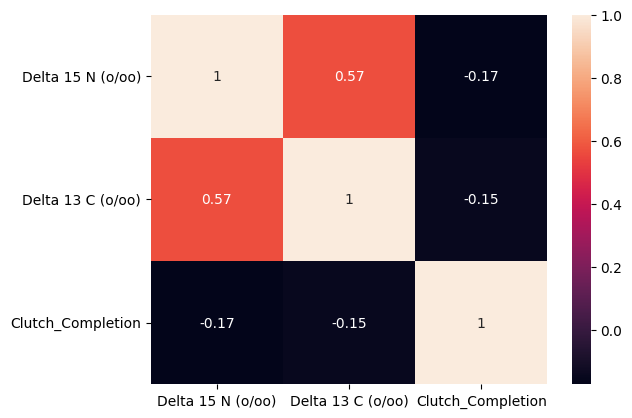

In [737]:
peng_df['Clutch_Completion'] = peng_df['Clutch_Completion'].replace(['Yes'], 1)
peng_df['Clutch_Completion'] = peng_df['Clutch_Completion'].replace(['No'], 0)

delta_n_o_clutch = peng_df[['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Clutch_Completion']]
plt.figure()
corr_coeff_mat = delta_n_o_clutch.corr() 
sns.heatmap(corr_coeff_mat, annot=True) 
plt.show()
plt.close()

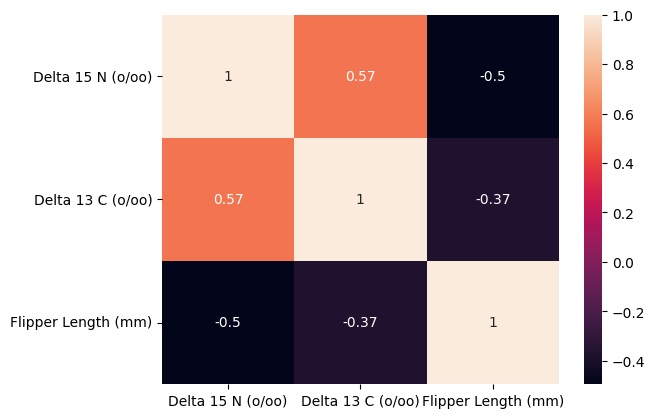

In [738]:

delta_n_o_clutch = peng_df[['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Flipper Length (mm)']]
plt.figure()
corr_coeff_mat = delta_n_o_clutch.corr() 
sns.heatmap(corr_coeff_mat, annot=True) 
plt.show()
plt.close()

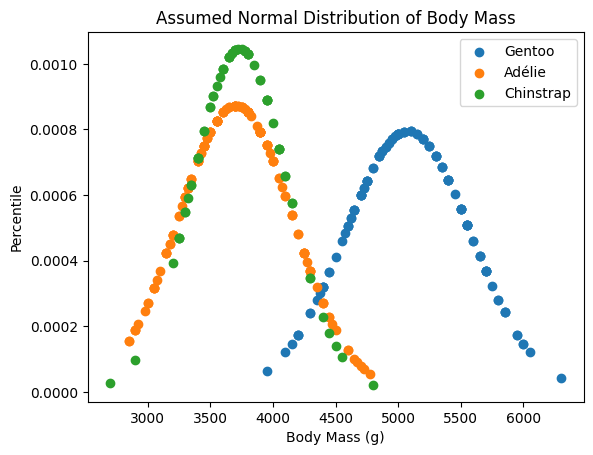

In [739]:
gentoo_bell = bell_curve(gentoo_df['Body Mass (g)']) # Gets distribution of masses along bell curve

adelie_bell = bell_curve(adelie_df['Body Mass (g)'])

chinstrap_bell = bell_curve(chinstrap_df['Body Mass (g)'])

plt.scatter(gentoo_df['Body Mass (g)'], gentoo_bell)
plt.scatter(adelie_df['Body Mass (g)'], adelie_bell)
plt.scatter(chinstrap_df['Body Mass (g)'], chinstrap_bell)
plt.xlabel('Body Mass (g)')
plt.ylabel('Percentile')
plt.legend(['Gentoo', 'Adélie', 'Chinstrap'])
plt.title('Assumed Normal Distribution of Body Mass')
plt.show()